In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('deliverytime.txt')

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [5]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [10]:
#Haversine formula
def haversine(lat1,lat2,long1,long2):
    lat1,lat2,long1,long2 = map(np.radians,[lat1,lat2,long1,long2])
    dlat=lat2-lat1
    dlong=long2-long1
    c=np.sin(dlat/2)**2+np.cos(lat1)*np.cos(lat2)*np.sin(dlong/2)**2
    
    r=2*np.arcsin(np.sqrt(c))
    return 6371*r

In [11]:
df['dist']=df[['Restaurant_latitude','Delivery_location_latitude','Restaurant_longitude','Delivery_location_longitude']].apply(lambda x: haversine(x[0],x[1],x[2],x[3]),axis=1)

In [14]:
df['dist'].describe()

count    45593.000000
mean        99.303911
std       1099.731281
min          1.465067
25%          4.663493
50%          9.264281
75%         13.763977
max      19692.674606
Name: dist, dtype: float64

In [15]:
#EDA
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

(array([   38.,     0.,     0.,   102.,   121.,  1106.,  6695., 33482.,
         3996.,    53.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

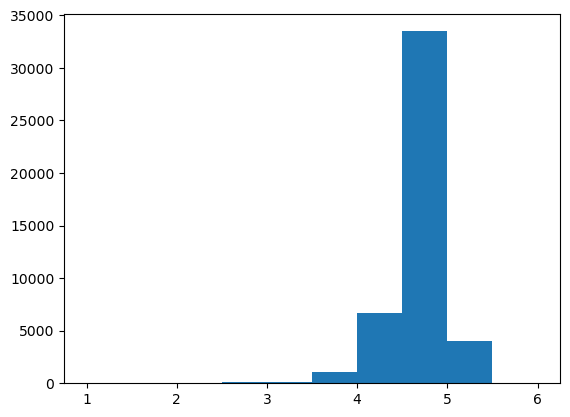

In [106]:
x=df['Delivery_person_Ratings']
plt.hist(x,bins=10)

In [43]:
num_col=[x for x in df.columns if df[x].dtype!='O']

In [44]:
num_col

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Time_taken(min)',
 'dist']

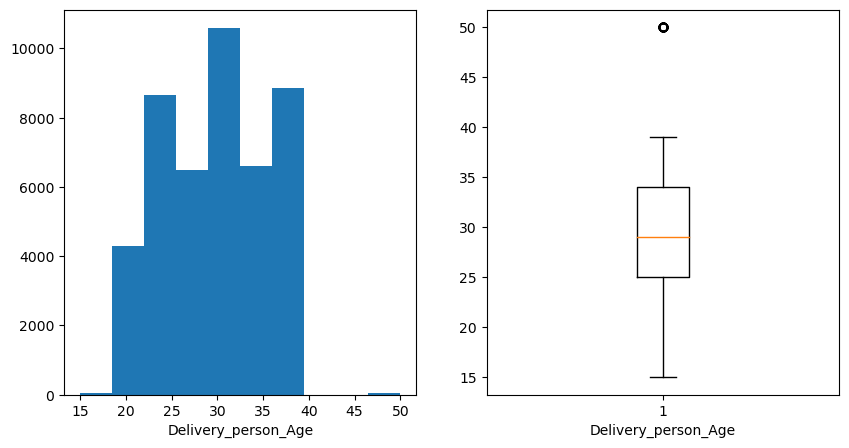

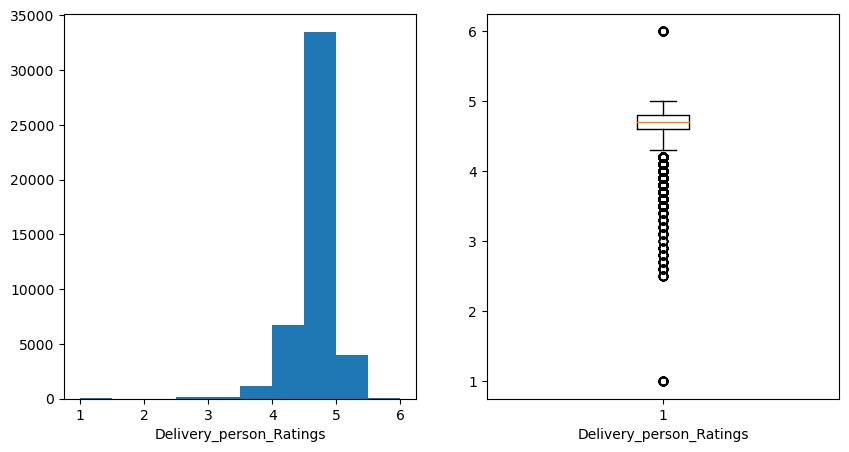

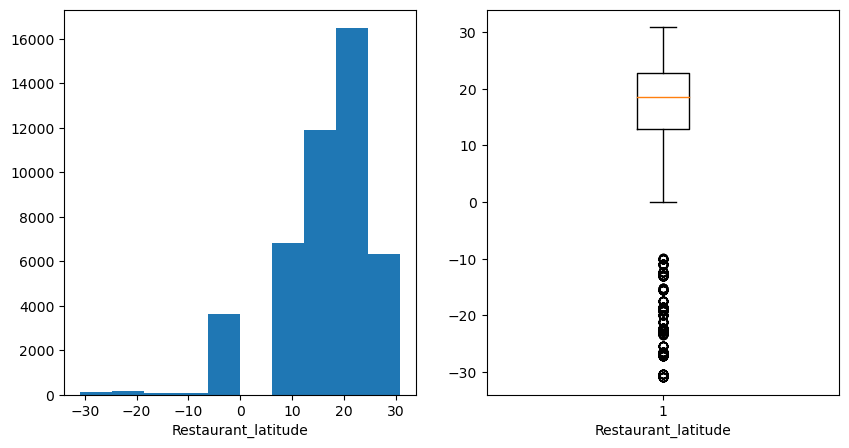

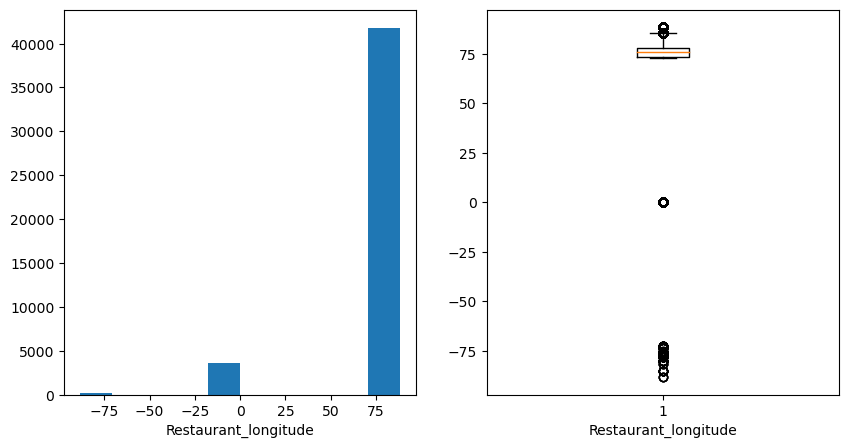

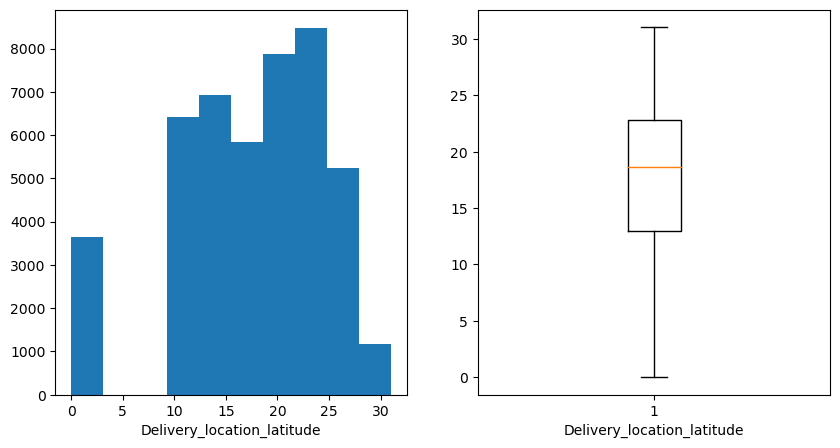

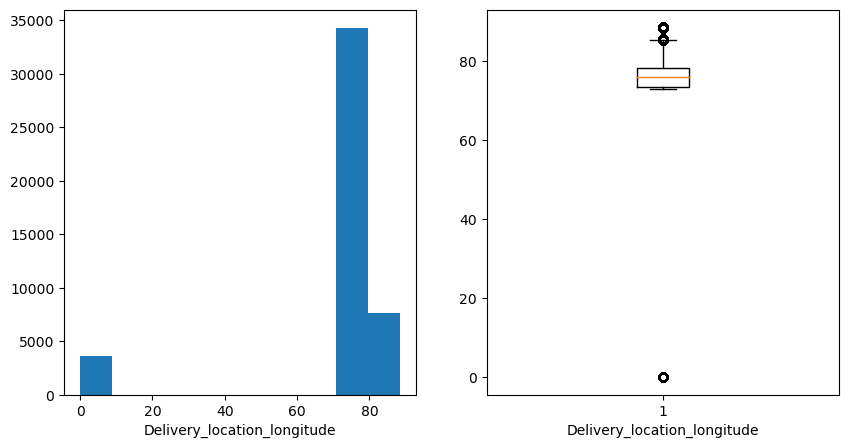

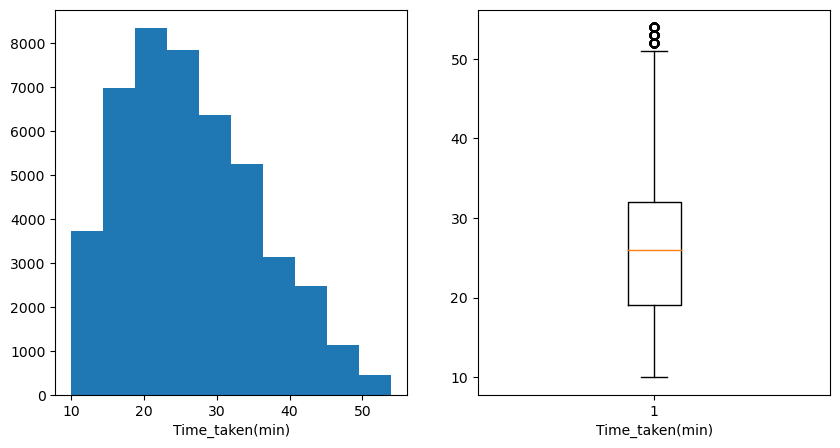

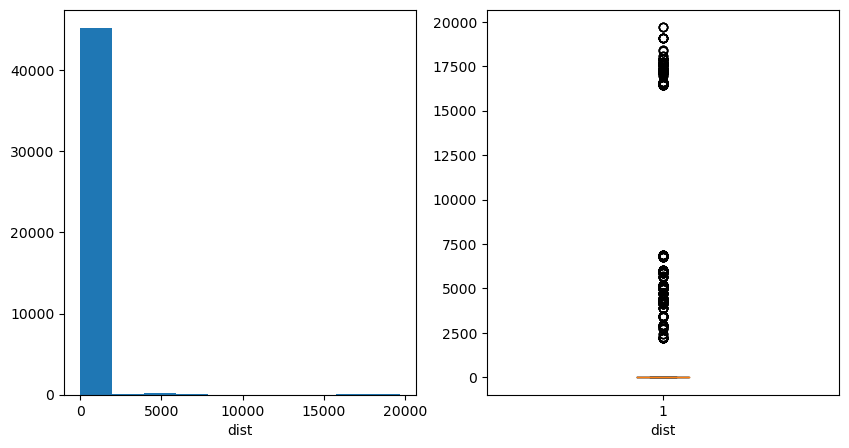

In [49]:
for i in num_col:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.hist(df[i])
    plt.xlabel(i)
    plt.subplot(1,2,2)
    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

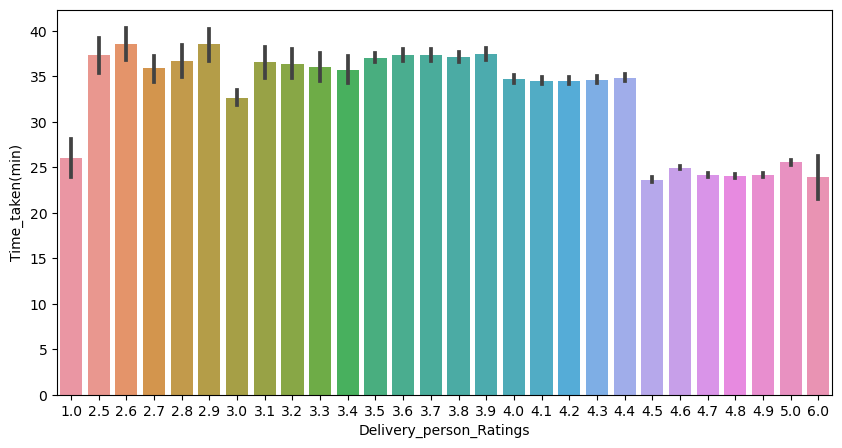

In [72]:
import seaborn as sb
plt.figure(figsize=(10,5))
sb.barplot(x=df['Delivery_person_Ratings'],y=df['Time_taken(min)'])
plt.show()

##### Obseravation
1. Mostly 4.5 to 6 rating persons are delivered the food in 20-25 minutes.

In [80]:
df.mean()

C:\Users\hemanth\AppData\Local\Temp\ipykernel_27016\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Delivery_person_Age            29.544075
Delivery_person_Ratings         4.632367
Restaurant_latitude            17.017729
Restaurant_longitude           70.231332
Delivery_location_latitude     17.465186
Delivery_location_longitude    70.845702
Time_taken(min)                26.294607
dist                           99.303911
dtype: float64

In [81]:
df.median()

C:\Users\hemanth\AppData\Local\Temp\ipykernel_27016\530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Delivery_person_Age            29.000000
Delivery_person_Ratings         4.700000
Restaurant_latitude            18.546947
Restaurant_longitude           75.898497
Delivery_location_latitude     18.633934
Delivery_location_longitude    76.002574
Time_taken(min)                26.000000
dist                            9.264281
dtype: float64

C:\Users\hemanth\AppData\Local\Temp\ipykernel_27016\1998887964.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.plot(df.median(),'ro--',label='Median')
C:\Users\hemanth\AppData\Local\Temp\ipykernel_27016\1998887964.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.plot(df.mean(),'b*--',label='Mean')


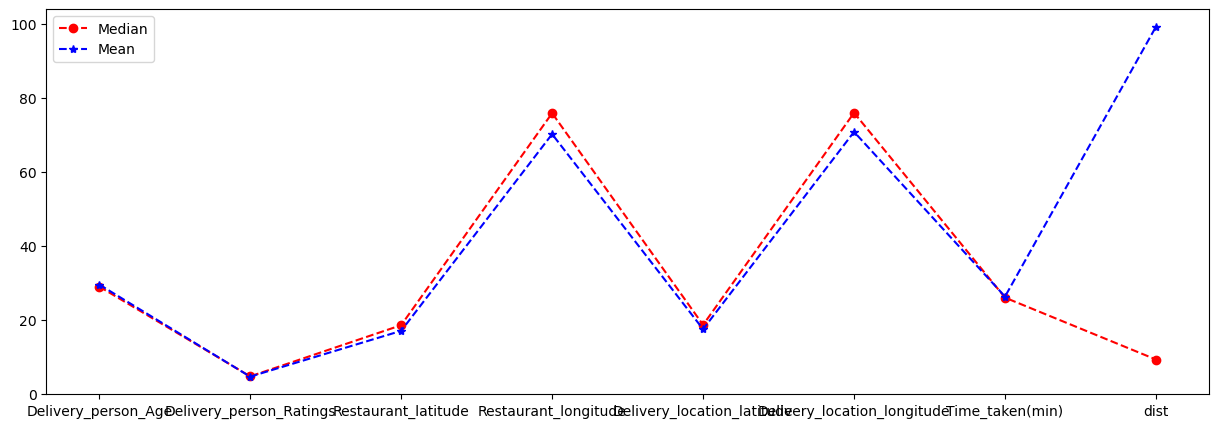

In [105]:
plt.figure(figsize=(15,5))
plt.plot(df.median(),'ro--',label='Median')
plt.plot(df.mean(),'b*--',label='Mean')
plt.legend()
plt.show()

1. Most of the all numeric columns - Mean and median are almost same.

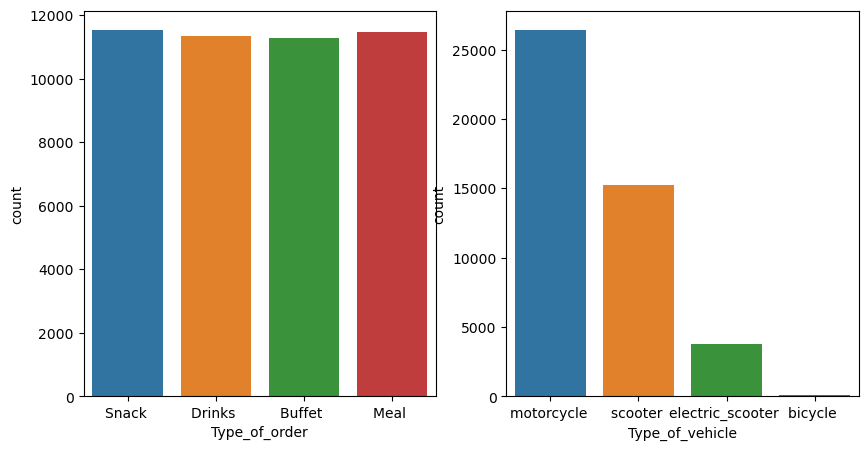

In [115]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1,)
sb.countplot(x='Type_of_order',data=df)
plt.subplot(1,2,2)
sb.countplot(x='Type_of_vehicle',data=df)
plt.show()

1. Almost all type of orders are ordered equally.
2. Most of the motorcycles and scooters are used for food delivery.

<AxesSubplot: xlabel='Type_of_vehicle', ylabel='count'>

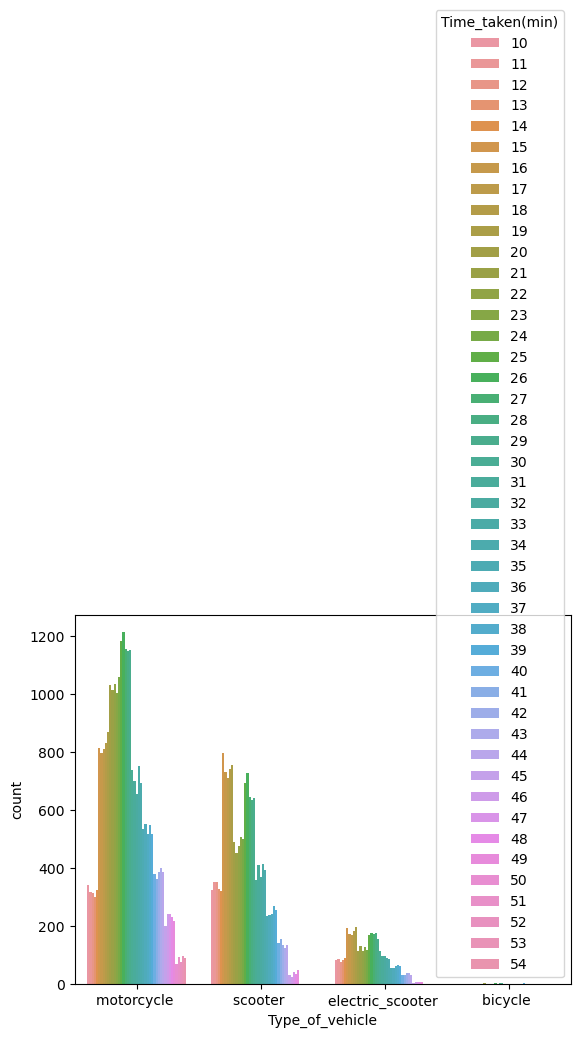

In [138]:
sb.countplot(x='Type_of_vehicle',hue='Time_taken(min)',data=df)

C:\Users\hemanth\AppData\Local\Temp\ipykernel_27016\3264164387.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),annot=True)


<AxesSubplot: >

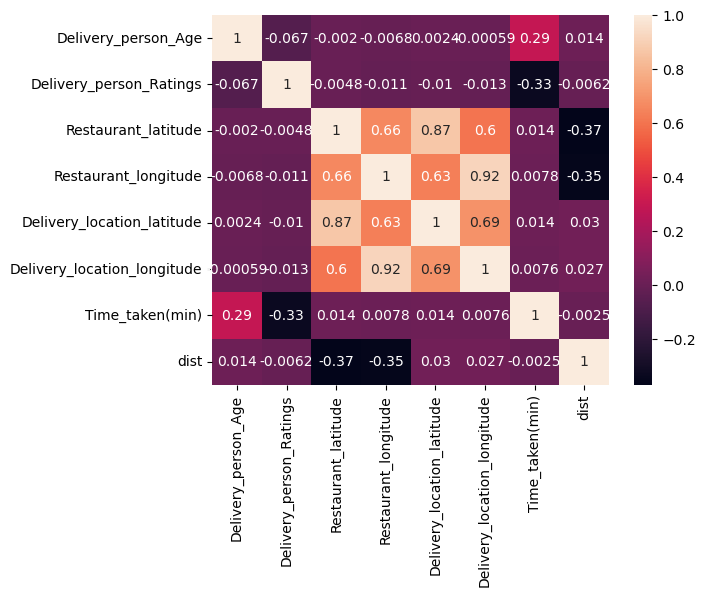

In [139]:
sb.heatmap(df.corr(),annot=True)